# Bírósági Határozatok - Exploratív Adatanalízis (EDA)

Ez a notebook a `preprocess_documents.py` által generált `raw_data_for_eda.csv` fájl tartalmát elemzi.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
from dotenv import load_dotenv
import os
import sys
from azure.storage.blob import BlobServiceClient
import io

sys.path.insert(0, os.path.abspath('..'))
load_dotenv()

AZURE_CONNECTION_STRING = os.getenv("AZURE_CONNECTION_STRING")
AZURE_CONTAINER_NAME = "courtrankrl"
BLOB_PATH = "processed/cleaned_documents.parquet"

# Adatok letöltése és beolvasása a Blob Storage-ból
print(f"Adatok letöltése: {AZURE_CONTAINER_NAME}/{BLOB_PATH}...")
try:
    blob_service_client = BlobServiceClient.from_connection_string(AZURE_CONNECTION_STRING)
    blob_client = blob_service_client.get_blob_client(container=AZURE_CONTAINER_NAME, blob=BLOB_PATH)
    stream_downloader = blob_client.download_blob()
    print("Adatok letöltve sikeresen.")
except Exception as e:
    print(f"Hiba történt a Blob Storage-ból való letöltés során: {e}")
    sys.exit(1)

# Matplotlib beállítások
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 12

Adatok letöltése: courtrankrl/processed/cleaned_documents.parquet...
Adatok letöltve sikeresen.


## 1. Adatok Betöltése

In [ ]:
print(f"Adatok betöltése innen: {DATA_PATH}")
if not DATA_PATH.exists():
    print(f"Hiba: A fájl nem található: {DATA_PATH}")
    print("Kérlek, futtasd először a preprocess_documents.py szkriptet.")
else:
    try:
        df = pd.read_csv(DATA_PATH, encoding=config.CSV_ENCODING if 'config' in locals() else 'utf-8')
        print(f"{len(df)} dokumentum betöltve.")

        # Oszlopok eldobása
        columns_to_drop = ['Rezume', 'IndexelesIdeje', 'IndexId']
        existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
        if existing_columns_to_drop:
            df.drop(columns=existing_columns_to_drop, inplace=True)
            print(f"Eltávolított oszlopok: {existing_columns_to_drop}")
        else:
            print("A megadott oszlopok ('Rezume', 'IndexelesIdeje', 'IndexId') egyike sem található.")

        # Oszlopok átnevezése
        rename_mapping = {
            'AllKapcsolodoUgyszam': 'Kapcsolódó Ügyszám',
            'AllKapcsolodoBirosag': 'Kapcsolódó Bíróság'
        }
        # Csak a létező oszlopokat nevezzük át
        existing_rename_mapping = {k: v for k, v in rename_mapping.items() if k in df.columns}
        if existing_rename_mapping:
            df.rename(columns=existing_rename_mapping, inplace=True)
            print(f"Átnevezett oszlopok: {existing_rename_mapping}")
        else:
            print("Az átnevezendő oszlopok ('AllKapcsolodoUgyszam', 'AllKapcsolodoBirosag') egyike sem található.")

        print(f"Megmaradt oszlopok: {df.columns.tolist()}")
    except Exception as e:
        print(f"Hiba a CSV olvasása vagy feldolgozása közben: {e}")

SyntaxError: invalid syntax (842009006.py, line 24)

## 2. Alapvető Információk és Statisztikák

In [3]:
if 'df' in locals():
    print("Adatkeret mérete (sorok, oszlopok):", df.shape)
    print("\nElső 5 sor:")
    display(df.head())
    print("\nAdattípusok és nem-null értékek:")
    df.info()
    print("\nLeíró statisztikák (numerikus oszlopok):")
    display(df.describe())
    print("\nLeíró statisztikák (kategorikus és egyéb oszlopok):")
    display(df.describe(include=['object', 'boolean']))

Adatkeret mérete (sorok, oszlopok): (216642, 13)

Első 5 sor:


doc_id                                               text  \
0  G.21002/2009/17  A GYÖNGYÖSI VÁROSI BIRÓSÁG 3.G.21.002/2009/17....   
1  G.20992/2012/31  A GYÖNGYÖSI JÁRÁSBÍRÓSÁG 7.G.20.992/2012/31. s...   
2  G.20134/2005/45  A GYÖNGYÖSI VÁROSI BÍRÓSÁG 3.G.20.134/2005/45....   
3  G.20450/2013/21  GYÖNGYÖSI JÁRÁSBÍRÓSÁG 3.G.20.450/2013/21. szá...   
4  P.20292/2013/21  A GYÖNGYÖSI JÁRÁSBÍRÓSÁG 1.P.20.292/2013/21. s...   

                  birosag     JogTerulet        Azonosito  \
0  Gyöngyösi Járásbíróság  gazdasági jog  G.21002/2009/17   
1  Gyöngyösi Járásbíróság  gazdasági jog  G.20992/2012/31   
2  Gyöngyösi Járásbíróság  gazdasági jog  G.20134/2005/45   
3  Gyöngyösi Járásbíróság  gazdasági jog  G.20450/2013/21   
4  Gyöngyösi Járásbíróság    polgári jog  P.20292/2013/21   

           MeghozoBirosag EgyediAzonosito  HatarozatEve  \
0  Gyöngyösi Járásbíróság  10/3-GJ-2010-1        2010.0   
1  Gyöngyösi Járásbíróság  10/3-GJ-2013-1        2013.0   
2  Gyöngyösi Járásbíróság  10/3-GJ-2006-1        2006.0   
3  Gyöngyösi Járásbíróság  10/3-GJ-2014-1        2014.0   
4  Gyöngyösi Járásbíróság  10/3-PJ-2013-4        2013.0   

                        Kapcsolódó Ügyszám             Kapcsolódó Bíróság  \
0  ["Pfv.21145/2011/5", "Gf.25804/2010/4"]  ["Kúria", "Egri Törvényszék"]   
1  ["Gf.20041/2014/9", "Pfv.21605/2014/5"]  ["Egri Törvényszék", "Kúria"]   
2  ["Pfv.20181/2008/3", "Pf.25471/2007/4"]  ["Kúria", "Egri Törvényszék"]   
3  ["Gf.20264/2014/7", "Pfv.20827/2015/7"]  ["Egri Törvényszék", "Kúria"]   
4  ["Pf.20036/2014/6", "Pfv.21483/2014/4"]  ["Egri Törvényszék", "Kúria"]   

                               KapcsolodoHatarozatok  \
0  [{"KapcsolodoUgyszam": "Pfv.21145/2011/5", "Ka...   
1  [{"KapcsolodoUgyszam": "Gf.20041/2014/9", "Kap...   
2  [{"KapcsolodoUgyszam": "Pfv.20181/2008/3", "Ka...   
3  [{"KapcsolodoUgyszam": "Gf.20264/2014/7", "Kap...   
4  [{"KapcsolodoUgyszam": "Pf.20036/2014/6", "Kap...   

                                    Jogszabalyhelyek           Kollegium  
0  1952. évi III. törvény a polgári perrendtartás...           gazdasági  
1  1952. évi III. törvény a polgári perrendtartás...             polgári  
2  1952. évi III. törvény a polgári perrendtartás...  polgári; gazdasági  
3  1952. évi III. törvény a polgári perrendtartás...  polgári; gazdasági  
4  1952. évi III. törvény a polgári perrendtartás...             polgári


Adattípusok és nem-null értékek:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216642 entries, 0 to 216641
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   doc_id                 216642 non-null  object 
 1   text                   216625 non-null  object 
 2   birosag                216642 non-null  object 
 3   JogTerulet             216359 non-null  object 
 4   Azonosito              216360 non-null  object 
 5   MeghozoBirosag         216360 non-null  object 
 6   EgyediAzonosito        216360 non-null  object 
 7   HatarozatEve           216360 non-null  float64
 8   Kapcsolódó Ügyszám     177052 non-null  object 
 9   Kapcsolódó Bíróság     177052 non-null  object 
 10  KapcsolodoHatarozatok  177052 non-null  object 
 11  Jogszabalyhelyek       216288 non-null  object 
 12  Kollegium              216360 non-null  object 
dtypes: float64(1), object(12)
memory usage: 21.5+ MB

Leíró

HatarozatEve
count  216360.000000
mean     2014.867799
std         5.181282
min      1989.000000
25%      2010.000000
50%      2015.000000
75%      2019.000000
max      2025.000000


Leíró statisztikák (kategorikus és egyéb oszlopok):


doc_id                                               text  \
count            216642                                             216625   
unique           213419                                             216599   
top     Pf.20009/2024/4  504 Gateway Time-outThe server didn't respond ...   
freq                  4                                                 12   

       birosag   JogTerulet        Azonosito MeghozoBirosag EgyediAzonosito  \
count   216642       216359           216360         216360          216360   
unique     186            8           213137            159          214104   
top      Kúria  polgári jog  Pf.20200/2017/6          Kúria    1-GJ-2020-26   
freq     49441        84840                4          49441               2   

         Kapcsolódó Ügyszám        Kapcsolódó Bíróság  \
count                177052                    177052   
unique               174448                      1389   
top     ["Pf.20966/2009/4"]  ["Fővárosi Törvényszék"]   
freq                      4                     22238   

                                    KapcsolodoHatarozatok  \
count                                              177052   
unique                                             175533   
top     [{"KapcsolodoUgyszam": "Bf.1516/2012/4", "Kapc...   
freq                                                    2   

                                         Jogszabalyhelyek Kollegium  
count                                              216288    216360  
unique                                             215649        33  
top     1952. évi III. törvény a polgári perrendtartás...   polgári  
freq                                                   14     88508

## 3. Hiányzó Értékek Elemzése

Hiányzó értékek oszloponként:


Darabszám   Százalék
Kapcsolódó Ügyszám         39590  18.274388
Kapcsolódó Bíróság         39590  18.274388
KapcsolodoHatarozatok      39590  18.274388
Jogszabalyhelyek             354   0.163403
JogTerulet                   283   0.130630
Azonosito                    282   0.130169
MeghozoBirosag               282   0.130169
EgyediAzonosito              282   0.130169
HatarozatEve                 282   0.130169
Kollegium                    282   0.130169
text                          17   0.007847

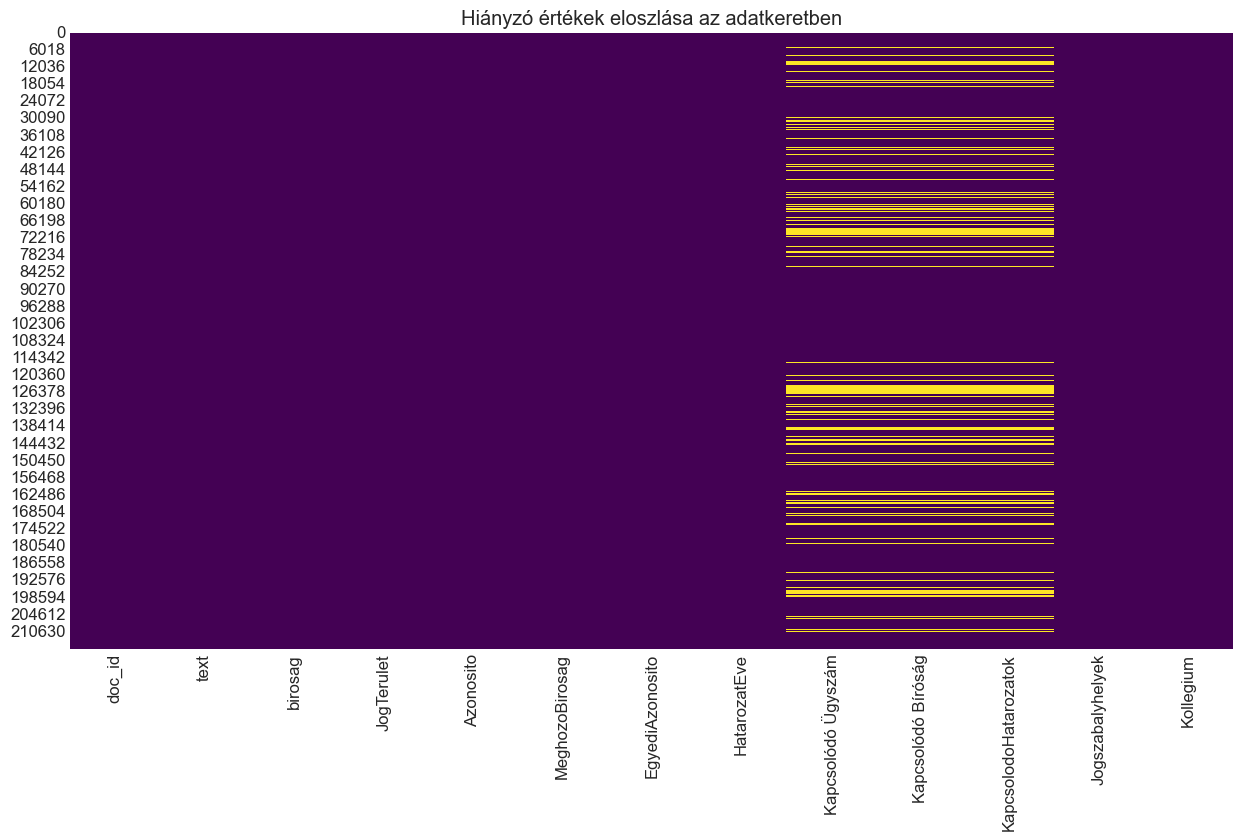

In [4]:
if 'df' in locals():
    missing_values = df.isnull().sum()
    missing_percent = (missing_values / len(df)) * 100
    missing_df = pd.DataFrame({'Darabszám': missing_values, 'Százalék': missing_percent})
    missing_df = missing_df[missing_df['Darabszám'] > 0].sort_values(by='Százalék', ascending=False)

    print("Hiányzó értékek oszloponként:")
    display(missing_df)

    # Hiányzó értékek vizualizációja (heatmap)
    plt.figure(figsize=(15, 8))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Hiányzó értékek eloszlása az adatkeretben')
    plt.show()

## 4. Szövegelemzés

Szöveghossz statisztikák (karakterek):


count    2.166420e+05
mean     2.618073e+04
std      3.352752e+04
min      0.000000e+00
25%      1.288100e+04
50%      1.935950e+04
75%      2.986100e+04
max      1.578577e+06
Name: text_length, dtype: float64


Az adatok 99%-a 126091 karakternél rövidebb szöveget tartalmaz.
A hisztogram csak ezeket az adatokat mutatja ( 214475 db ).


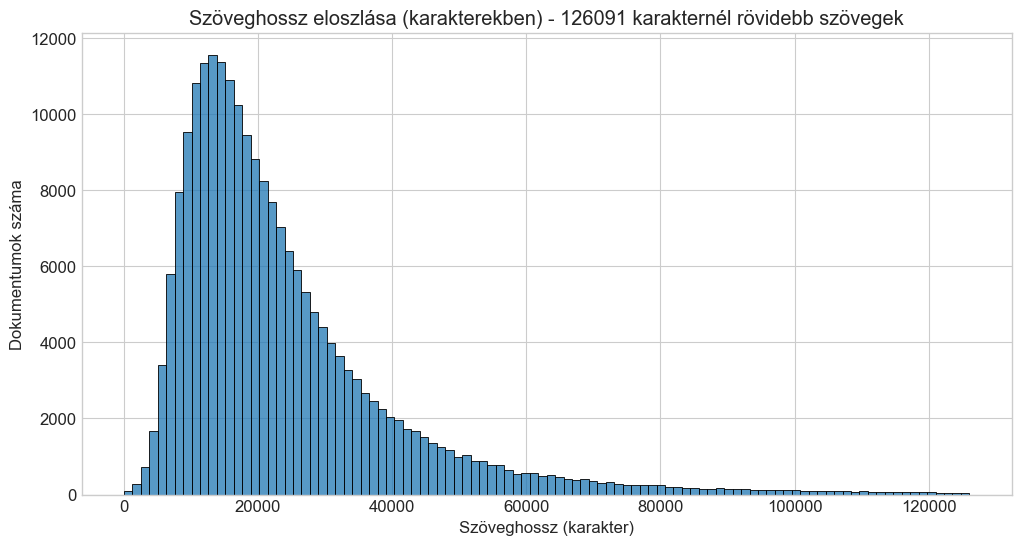


21 db 50 karakternél rövidebb dokumentum található.
Példák rövid szövegekre (max 10):


doc_id text  text_length
16542  B.1318/2009/2000  NaN            0
29209    G.43587/2014/6  NaN            0
29792    G.44559/2014/4  NaN            0
29909   G.41342/2015/15  NaN            0
30969    G.44617/2014/4  NaN            0
31733    G.41348/2015/7  NaN            0
31950    G.41341/2015/9  NaN            0
32293   G.41343/2015/11  NaN            0
32950    G.43469/2014/6  NaN            0
34558   Kb.393/2013/261  NaN            0


17 db üres szövegű dokumentum található.
Példák üres szövegekre (max 10):


doc_id  text_length
16542  B.1318/2009/2000            0
29209    G.43587/2014/6            0
29792    G.44559/2014/4            0
29909   G.41342/2015/15            0
30969    G.44617/2014/4            0
31733    G.41348/2015/7            0
31950    G.41341/2015/9            0
32293   G.41343/2015/11            0
32950    G.43469/2014/6            0
34558   Kb.393/2013/261            0

In [5]:
if 'df' in locals() and 'text' in df.columns:
    # Szöveghossz számítása (karakterekben)
    df['text_length'] = df['text'].fillna('').astype(str).apply(len)

    print("Szöveghossz statisztikák (karakterek):")
    display(df['text_length'].describe())

    # Kiugró értékek szűrése a jobb vizualizáció érdekében
    # Például a 99. percentilis alatti értékek megjelenítése
    quantile_99 = df['text_length'].quantile(0.99)
    df_filtered_length = df[df['text_length'] < quantile_99]
    print(f"\nAz adatok 99%-a {quantile_99:.0f} karakternél rövidebb szöveget tartalmaz.")
    print(f"A hisztogram csak ezeket az adatokat mutatja ( {len(df_filtered_length)} db ).")

    # Szöveghossz eloszlás vizualizáció (szűrt adatokon)
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df_filtered_length, x='text_length', bins=100, kde=False)
    plt.title(f'Szöveghossz eloszlása (karakterekben) - {quantile_99:.0f} karakternél rövidebb szövegek')
    plt.xlabel('Szöveghossz (karakter)')
    plt.ylabel('Dokumentumok száma')
    plt.grid(True)
    plt.show()

    # Rövid szövegek vizsgálata
    short_text_threshold = 50
    short_texts = df[df['text_length'] < short_text_threshold]
    print(f"\n{len(short_texts)} db {short_text_threshold} karakternél rövidebb dokumentum található.")
    if not short_texts.empty:
        print(f"Példák rövid szövegekre (max 10):")
        display(short_texts[['doc_id', 'text', 'text_length']].head(10))

    # Üres szövegek vizsgálata
    empty_texts = df[df['text_length'] == 0]
    print(f"\n{len(empty_texts)} db üres szövegű dokumentum található.")
    if not empty_texts.empty:
        print(f"Példák üres szövegekre (max 10):")
        display(empty_texts[['doc_id', 'text_length']].head(10))

## 5. Kategorikus Változók Elemzése


'birosag' egyedi értékeinek száma: 130
Leggyakoribb 30 érték:


birosag
Kúria                                                   49441
Fővárosi Törvényszék                                    34428
Fővárosi Ítélőtábla                                     31997
Budapest Környéki Törvényszék                            8837
Debreceni Ítélőtábla                                     7130
Győri Ítélőtábla                                         6204
Szegedi Ítélőtábla                                       5787
Debreceni Törvényszék                                    5641
Szegedi Törvényszék                                      5083
Pécsi Ítélőtábla                                         4461
Miskolci Törvényszék                                     4359
Fővárosi Közigazgatási és Munkaügyi Bíróság              3701
Győri Törvényszék                                        3412
Veszprémi Törvényszék                                    3035
Pécsi Törvényszék                                        2828
Kecskeméti Törvényszék                                   2679


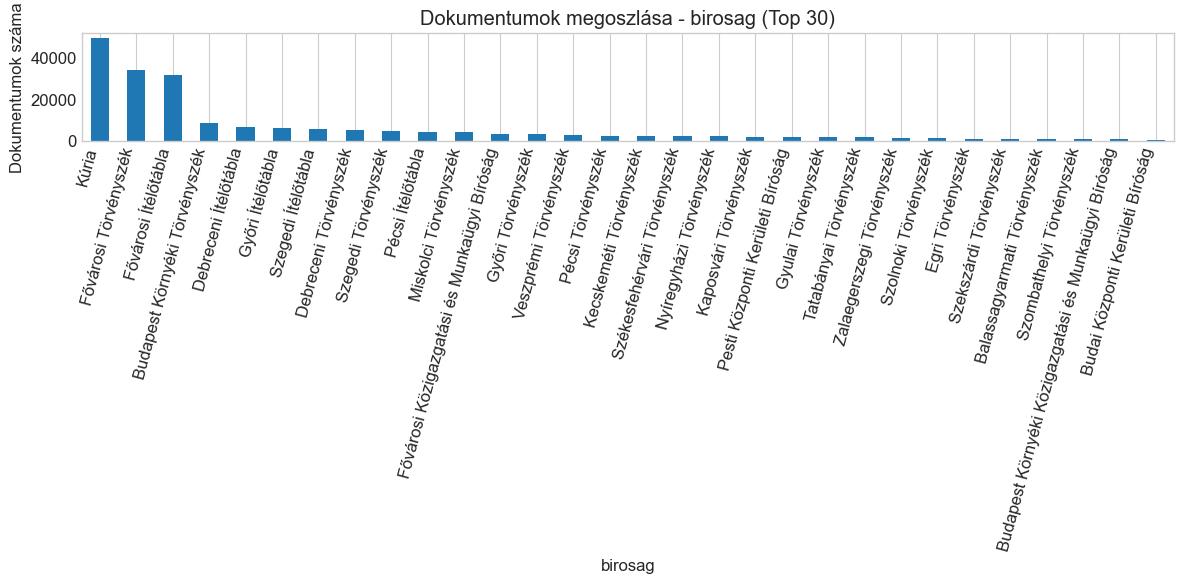


'JogTerulet' egyedi értékeinek száma: 8
Leggyakoribb 20 érték:


JogTerulet
polgári jog                  84840
közigazgatási jog            50158
büntetőjog                   34604
gazdasági jog                25312
munkaügy                     18556
katonai büntetőjog            2856
szabálysértési jog              27
büntetés-végrehajtási ügy        6
Name: count, dtype: int64

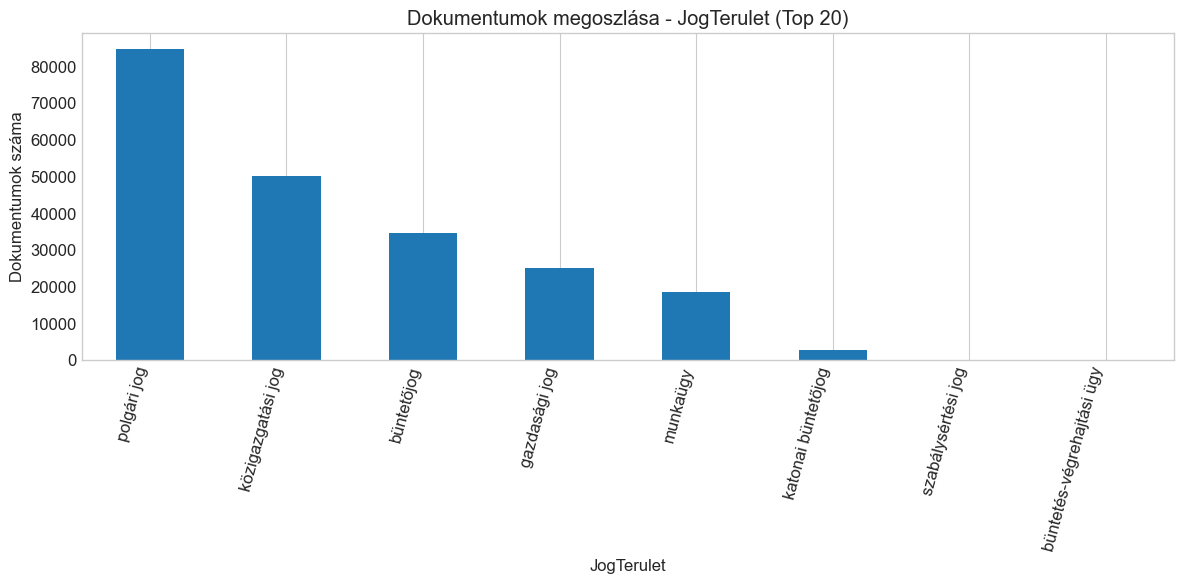


Érvényes 'HatarozatEve' értékek száma (2005 óta): 216171
Érvénytelen vagy hiányzó 'HatarozatEve' értékek száma: 471


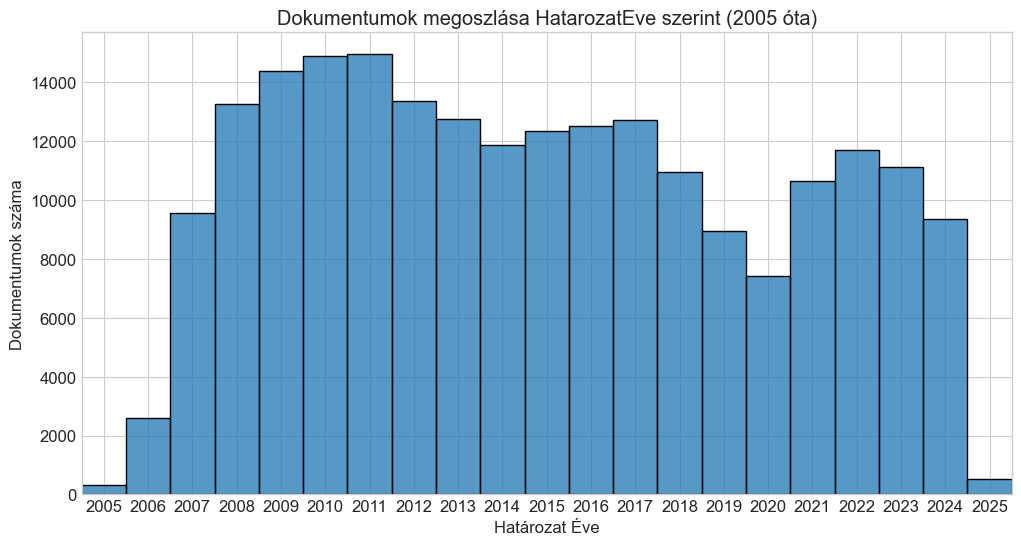

In [6]:
def plot_top_categories(df, column_name, top_n=20):
    """Segédfüggvény a leggyakoribb kategóriák megjelenítésére."""
    if column_name not in df.columns:
        print(f"Hiba: '{column_name}' oszlop nem található.")
        return

    counts = df[column_name].value_counts()
    print(f"\n'{column_name}' egyedi értékeinek száma: {counts.nunique()}")
    print(f"Leggyakoribb {top_n} érték:")
    display(counts.head(top_n))

    plt.figure(figsize=(12, 6))
    counts.head(top_n).plot(kind='bar')
    plt.title(f'Dokumentumok megoszlása - {column_name} (Top {top_n})')
    plt.xlabel(column_name)
    plt.ylabel('Dokumentumok száma')
    plt.xticks(rotation=75, ha='right')
    plt.grid(axis='y')
    plt.tight_layout() # Ensure labels fit
    plt.show()

if 'df' in locals():
    # Bíróság elemzése
    plot_top_categories(df, 'birosag', top_n=30)

    # Jogterület elemzése
    # Megjegyzés: A JogTerulet lehet komplex (pl. lista). A preprocess script stringgé alakítja.
    # Ha mégsem, akkor itt további tisztításra lehet szükség.
    plot_top_categories(df, 'JogTerulet', top_n=20)

    # HatarozatEve elemzése
    if 'HatarozatEve' in df.columns:
        # Érvényes évszámok szűrése (pl. 2005-től napjainkig) és integer típussá alakítás
        # Use Int64 to handle potential NaNs while keeping integer type
        df['HatarozatEve_num'] = pd.to_numeric(df['HatarozatEve'], errors='coerce').astype('Int64')
        valid_years_mask = (df['HatarozatEve_num'] >= 2005) & (df['HatarozatEve_num'] <= pd.Timestamp.now().year)
        valid_years = df.loc[valid_years_mask, 'HatarozatEve_num']

        print(f"\nÉrvényes 'HatarozatEve' értékek száma (2005 óta): {len(valid_years)}")
        print(f"Érvénytelen vagy hiányzó 'HatarozatEve' értékek száma: {len(df) - len(valid_years)}")

        if not valid_years.empty:
            plt.figure(figsize=(12, 6))
            # Use discrete=True for integer years to center bars on ticks
            min_year = valid_years.min()
            max_year = valid_years.max()
            # Let histplot handle bins for discrete data
            sns.histplot(x=valid_years, kde=False, discrete=True)
            plt.title('Dokumentumok megoszlása HatarozatEve szerint (2005 óta)')
            plt.xlabel('Határozat Éve')
            plt.ylabel('Dokumentumok száma')
            # Ensure ticks are placed at integer years
            tick_step = max(1, (max_year - min_year) // 20) # Adjust step for readability
            plt.xticks(ticks=range(min_year, max_year + 1, tick_step), rotation=0) # Set rotation to 0 for clarity if possible
            plt.xlim(min_year - 0.5, max_year + 0.5) # Keep slight padding
            plt.grid(True)
            plt.show()
        else:
            print("\n'HatarozatEve' oszlop nem található vagy nincsenek érvényes évszámok 2005 óta.")

## 5.1. Bíróság és Jogterület Kapcsolata


Bíróság és Jogterület kapcsolata:


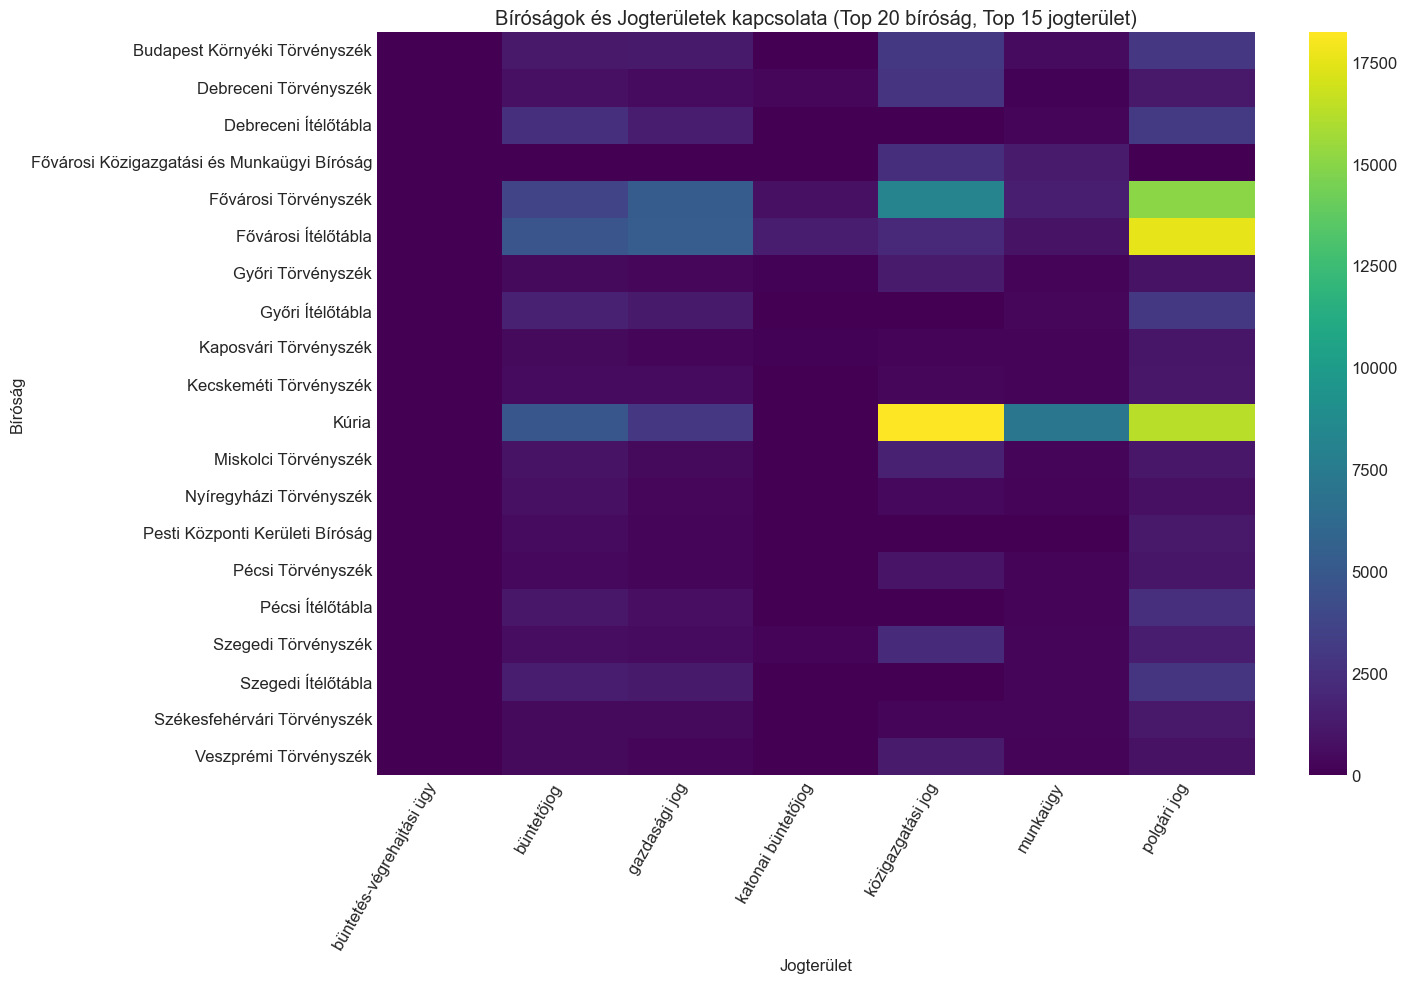

In [7]:
if 'df' in locals() and 'birosag' in df.columns and 'JogTerulet' in df.columns:
    print("\nBíróság és Jogterület kapcsolata:")
    top_n_birosag = 20
    top_m_jogterulet = 15
    top_birosagok = df['birosag'].value_counts().nlargest(top_n_birosag).index
    top_jogteruletek = df['JogTerulet'].value_counts().nlargest(top_m_jogterulet).index
    df_filtered = df[df['birosag'].isin(top_birosagok) & df['JogTerulet'].isin(top_jogteruletek)]
    if not df_filtered.empty:
        crosstab_bj = pd.crosstab(df_filtered['birosag'], df_filtered['JogTerulet'])
        plt.figure(figsize=(15, 10))
        sns.heatmap(crosstab_bj, cmap="viridis", annot=False, fmt="d")
        plt.title(f'Bíróságok és Jogterületek kapcsolata (Top {top_n_birosag} bíróság, Top {top_m_jogterulet} jogterület)')
        plt.xlabel('Jogterület')
        plt.ylabel('Bíróság')
        plt.xticks(rotation=60, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
    else:
        print("Nem található elég adat a szűrt bíróságokhoz és jogterületekhez a kereszttábla elkészítéséhez.")

## 5.2. Szöveghossz és Kategóriák

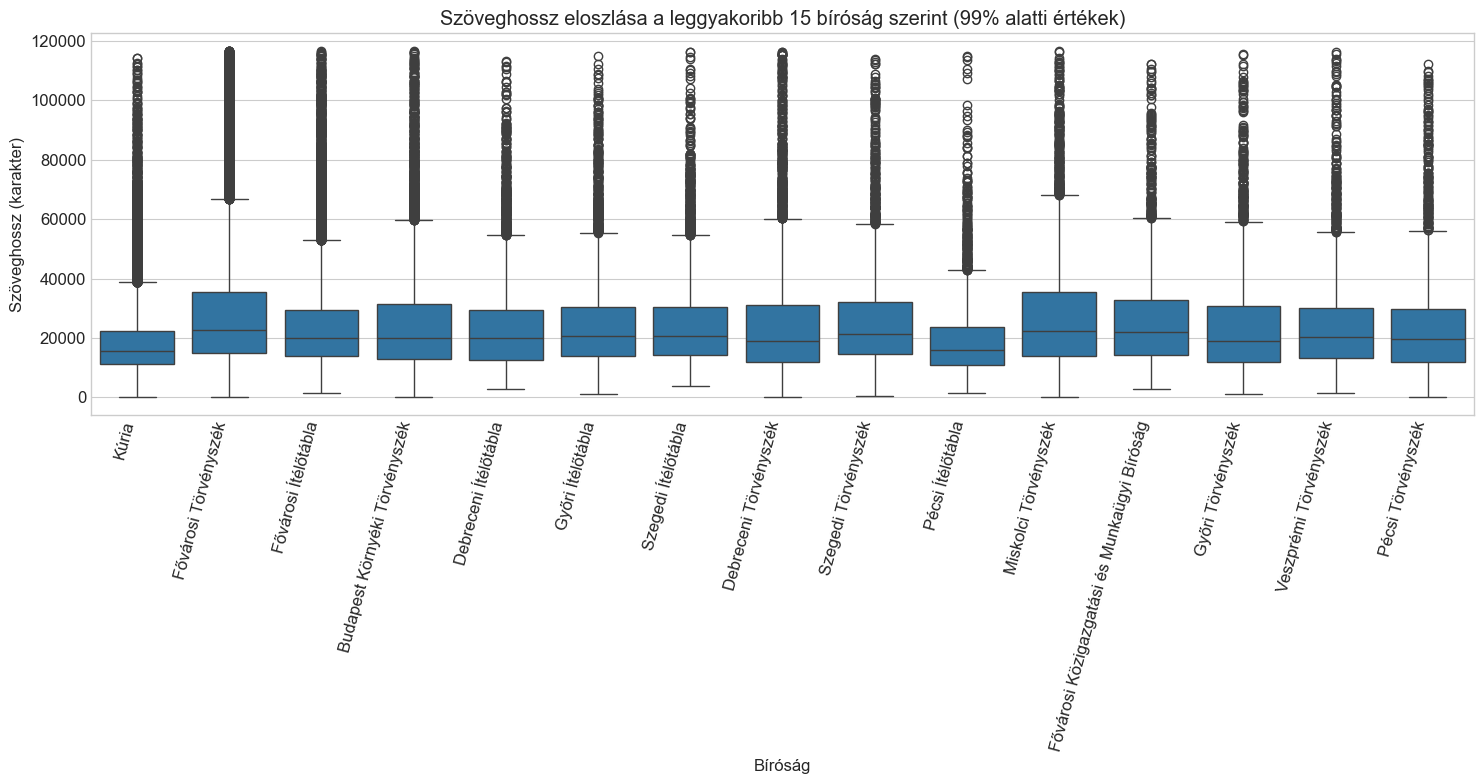

In [8]:
if 'df' in locals() and 'text_length' in df.columns:
    top_n = 15
    if 'birosag' in df.columns:
        top_birosagok = df['birosag'].value_counts().nlargest(top_n).index
        df_filtered_birosag = df[df['birosag'].isin(top_birosagok)]
        quantile_99 = df_filtered_birosag['text_length'].quantile(0.99)
        df_plot_birosag = df_filtered_birosag[df_filtered_birosag['text_length'] < quantile_99]
        plt.figure(figsize=(15, 8))
        sns.boxplot(data=df_plot_birosag, x='birosag', y='text_length', order=top_birosagok)
        plt.title(f'Szöveghossz eloszlása a leggyakoribb {top_n} bíróság szerint (99% alatti értékek)')
        plt.xlabel('Bíróság')
        plt.ylabel('Szöveghossz (karakter)')
        plt.xticks(rotation=75, ha='right')
        plt.tight_layout()
        plt.show()
    if 'JogTerulet' in df.columns:
        top_jogteruletek = df['JogTerulet'].value_counts().nlargest(top_n).index
        df_filtered_jogterulet = df[df['JogTerulet'].isin(top_jogteruletek)]
        quantile_99_jt = df_filtered_jogterulet['text_length'].quantile(0.99)
        df_plot_jogterulet = df_filtered_jogterulet[df_filtered_jogterulet['text_length'] < quantile_99_jt]
        plt.figure(figsize=(15, 8))
        sns.boxplot(data=df_plot_jogterulet, x='JogTerulet', y='text_length', order=top_jogteruletek)
        plt.title(f'Szöveghossz eloszlása a leggyakoribb {top_n} jogterület szerint (99% alatti értékek)')
        plt.xlabel('Jogterület')
        plt.ylabel('Szöveghossz (karakter)')
        plt.xticks(rotation=75, ha='right')
        plt.tight_layout()
        plt.show()

## 5.3. Időbeli Trendek


Jogterületek gyakoriságának változása az évek során:


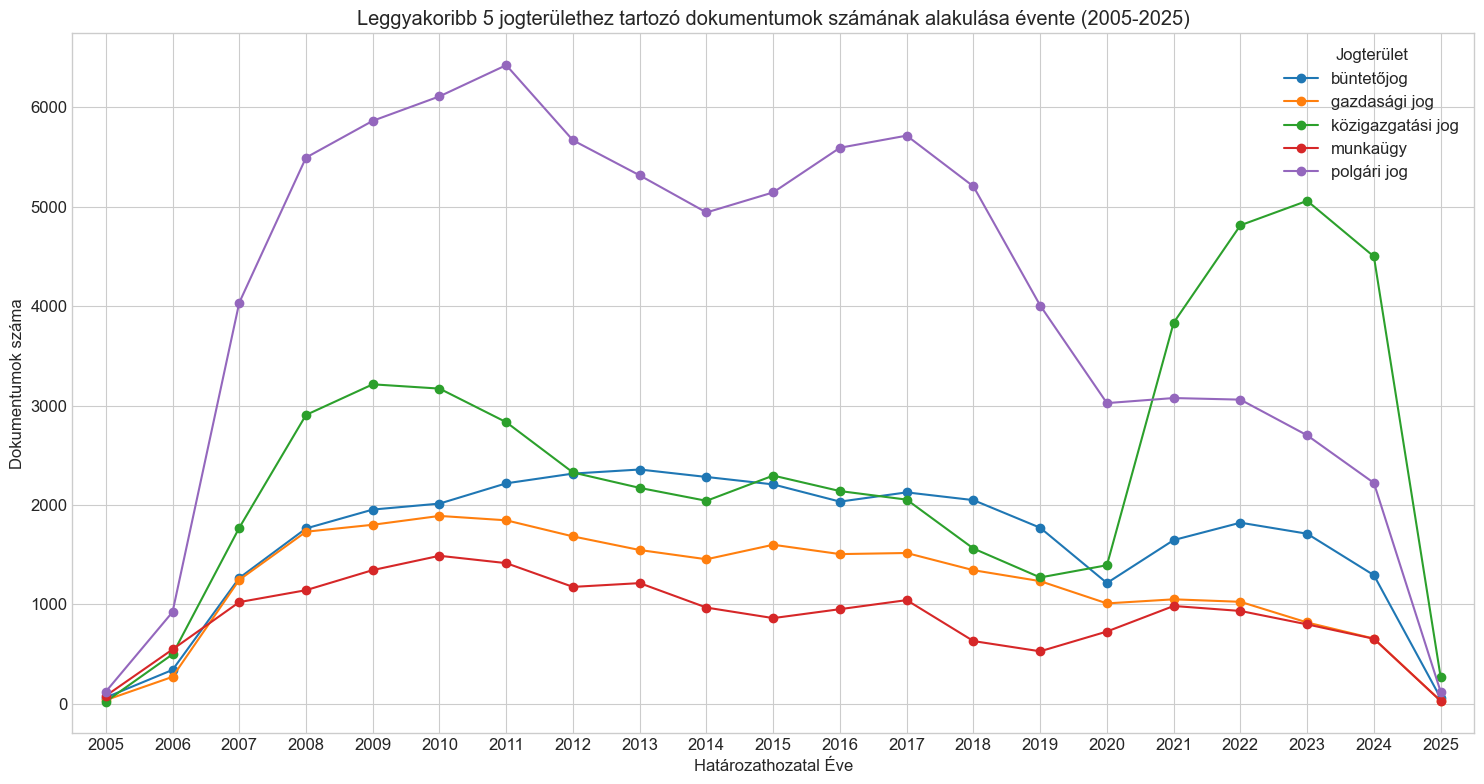

In [9]:
if 'df' in locals() and 'HatarozatEve_num' in df.columns and 'JogTerulet' in df.columns:
    print("\nJogterületek gyakoriságának változása az évek során:")
    # Ensure HatarozatEve_num is Int64 before filtering
    if not pd.api.types.is_integer_dtype(df['HatarozatEve_num']):
         df['HatarozatEve_num'] = pd.to_numeric(df['HatarozatEve'], errors='coerce').astype('Int64')

    min_analysis_year = 2005
    current_year = pd.Timestamp.now().year
    valid_years_mask = (df['HatarozatEve_num'] >= min_analysis_year) & (df['HatarozatEve_num'] <= current_year)
    top_m_jogterulet = 5
    top_jogteruletek = df['JogTerulet'].value_counts().nlargest(top_m_jogterulet).index
    df_filtered_time = df[valid_years_mask & df['JogTerulet'].isin(top_jogteruletek)].copy()

    if not df_filtered_time.empty:
        trends = df_filtered_time.groupby(['HatarozatEve_num', 'JogTerulet']).size().unstack(fill_value=0)
        plt.figure(figsize=(15, 8))
        trends.plot(kind='line', marker='o', ax=plt.gca()) # Added marker for clarity
        plt.title(f'Leggyakoribb {top_m_jogterulet} jogterülethez tartozó dokumentumok számának alakulása évente ({min_analysis_year}-{current_year})')
        plt.xlabel('Határozathozatal Éve')
        plt.ylabel('Dokumentumok száma')
        plt.xticks(range(min_analysis_year, current_year + 1, max(1, (current_year - min_analysis_year) // 15))) # Adjust tick frequency
        plt.xlim(min_analysis_year - 0.5, current_year + 0.5) # Adjust xlim slightly
        plt.legend(title='Jogterület')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Nem található elég adat a top {top_m_jogterulet} jogterület időbeli trendjének vizsgálatához {min_analysis_year} óta.")

## 6. Azonosítók Elemzése

In [10]:
if 'df' in locals():
    for id_col in ['doc_id', 'Azonosito', 'EgyediAzonosito']:
        if id_col in df.columns:
            print(f"\n'{id_col}' elemzése:")
            uniqueness = df[id_col].nunique()
            total_rows = len(df)
            duplicates = total_rows - uniqueness
            print(f"  Összes sor: {total_rows}")
            print(f"  Egyedi értékek: {uniqueness}")
            print(f"  Duplikált értékek (vagy hiányzó): {duplicates}")
            if duplicates > 0:
                duplicated_ids = df[df.duplicated(subset=[id_col], keep=False)][id_col].value_counts()
                print(f"  Leggyakoribb duplikált/hiányzó '{id_col}' értékek:")
                display(duplicated_ids[duplicated_ids > 1].head())
        else:
            print(f"\n'{id_col}' oszlop nem található.")


'doc_id' elemzése:
  Összes sor: 216642
  Egyedi értékek: 213419
  Duplikált értékek (vagy hiányzó): 3223
  Leggyakoribb duplikált/hiányzó 'doc_id' értékek:


doc_id
Pf.20154/2018/4    4
Pf.20009/2024/4    4
Pf.20075/2017/4    4
Pf.20200/2017/6    4
Pf.20836/2014/3    3
Name: count, dtype: int64


'Azonosito' elemzése:
  Összes sor: 216642
  Egyedi értékek: 213137
  Duplikált értékek (vagy hiányzó): 3505
  Leggyakoribb duplikált/hiányzó 'Azonosito' értékek:


Azonosito
Pf.20154/2018/4    4
Pf.20009/2024/4    4
Pf.20075/2017/4    4
Pf.20200/2017/6    4
Pf.20836/2014/3    3
Name: count, dtype: int64


'EgyediAzonosito' elemzése:
  Összes sor: 216642
  Egyedi értékek: 214104
  Duplikált értékek (vagy hiányzó): 2538
  Leggyakoribb duplikált/hiányzó 'EgyediAzonosito' értékek:


EgyediAzonosito
10/3-BJ-2017-1    2
K-PJ-2021-38      2
K-PJ-2020-5       2
K-PJ-2021-50      2
K-PJ-2020-17      2
Name: count, dtype: int64

## 7. Kapcsolódó Határozatok Elemzése


'KapcsolodoHatarozatok' elemzése:
  Dokumentumok száma kapcsolódó határozattal (nem üres lista/nem NaN): 177052
  Dokumentumok száma kapcsolódó határozat nélkül (NaN vagy '[]'): 39590

'Kapcsolódó Bíróság' egyedi értékeinek száma: 235
Leggyakoribb 20 érték:


Kapcsolódó Bíróság
["Fővárosi Törvényszék"]                           22238
["Fővárosi Ítélőtábla"]                            21490
["Kúria"]                                          13477
["Budapest Környéki Törvényszék"]                   5006
["Kúria", "Fővárosi Törvényszék"]                   4653
["Győri Ítélőtábla"]                                4092
["Debreceni Ítélőtábla"]                            3973
["Szegedi Ítélőtábla"]                              3963
["Kúria", "Fővárosi Ítélőtábla"]                    2981
["Fővárosi Ítélőtábla", "Fővárosi Törvényszék"]     2864
["Pécsi Ítélőtábla"]                                2720
["Fővárosi Törvényszék", "Kúria"]                   2667
["Fővárosi Közigazgatási és Munkaügyi Bíróság"]     2636
["Debreceni Törvényszék"]                           2407
["Miskolci Törvényszék"]                            2401
["Szegedi Törvényszék"]                             2393
["Kecskeméti Törvényszék"]                          1978
["Győri Törv

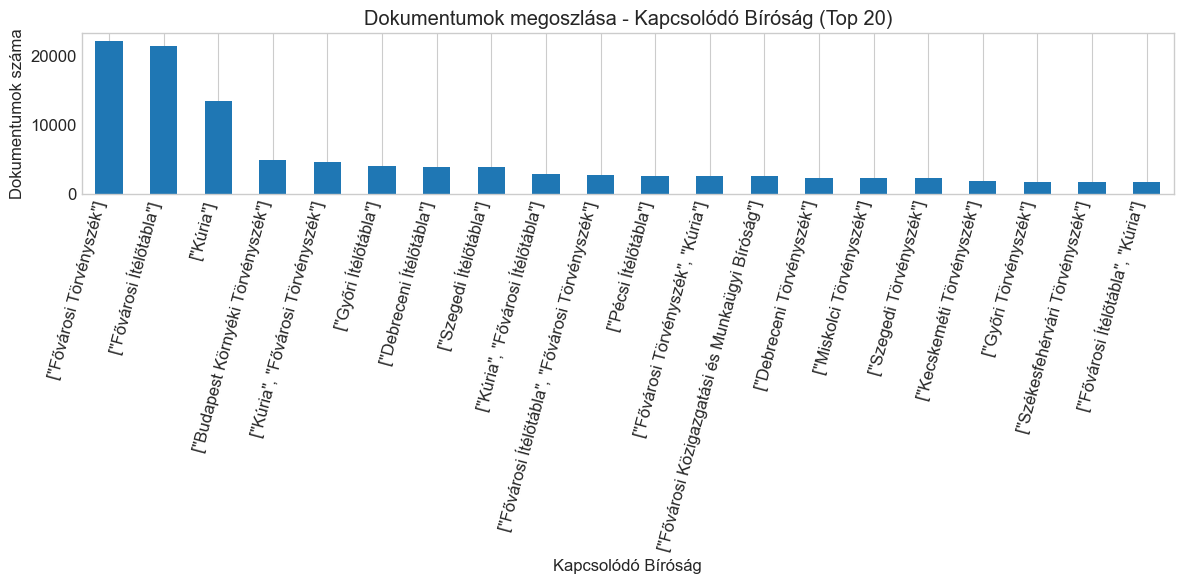


'Kapcsolódó Ügyszám' elemzése:
  Dokumentumok száma első kapcsolódó ügyszámmal: 177052
  Dokumentumok száma első kapcsolódó ügyszám nélkül: 39590

'Kapcsolódó Ügyszám' egyedi értékeinek száma: 4
Leggyakoribb 20 érték:


Kapcsolódó Ügyszám
["Pf.20966/2009/4"]    4
["Pf.21358/2010/3"]    4
["Bf.100/2011/4"]      4
["Pf.20427/2007/4"]    4
["Pf.20029/2018/6"]    3
["Bf.126/2008/4"]      3
["K.27407/2016/5"]     3
["Bf.181/2008/5"]      3
["Pf.20281/2007/5"]    3
["Pf.20777/2010/3"]    3
["Pf.20340/2010/4"]    3
["Pf.20059/2017/5"]    3
["Gf.40062/2008/4"]    3
["Pf.20306/2010/5"]    3
["Pf.20456/2011/4"]    3
["Pf.20048/2015/3"]    3
["Pf.20389/2009/4"]    3
["Pf.20332/2010/4"]    3
["Pf.20516/2008/4"]    3
["Bf.1/2008/6"]        3
Name: count, dtype: int64

In [11]:
if 'df' in locals():
    # KapcsolodoHatarozatok (JSON stringként tárolva)
    if 'KapcsolodoHatarozatok' in df.columns:
        print("\n'KapcsolodoHatarozatok' elemzése:")
        # Számoljuk, hány rekordnak van nem-üres/nem-null kapcs. hat. listája
        # Feltételezzük, hogy a preprocess script NaN-t, '[]'-t vagy más stringet/listát menthet
        # Ez a sor ellenőrzi, hogy az érték nem NaN ÉS nem az üres lista string reprezentációja
        has_related = df['KapcsolodoHatarozatok'].notna() & (df['KapcsolodoHatarozatok'] != '[]')
        print(f"  Dokumentumok száma kapcsolódó határozattal (nem üres lista/nem NaN): {has_related.sum()}")
        print(f"  Dokumentumok száma kapcsolódó határozat nélkül (NaN vagy '[]'): {len(df) - has_related.sum()}")
    else:
        print("\n'KapcsolodoHatarozatok' oszlop nem található.")

    # Első kapcsolódó bíróság elemzése
    if 'Kapcsolódó Bíróság' in df.columns:
        plot_top_categories(df, 'Kapcsolódó Bíróság', top_n=20)
    else:
        print("\n'Kapcsolódó Bíróság' oszlop nem található.")

    # Első kapcsolódó ügyszám elemzése
    if 'Kapcsolódó Ügyszám' in df.columns:
        print("\n'Kapcsolódó Ügyszám' elemzése:")
        # Először csak a jelenlétét nézzük
        has_all_ugyszam = df['Kapcsolódó Ügyszám'].notna().sum()
        print(f"  Dokumentumok száma első kapcsolódó ügyszámmal: {has_all_ugyszam}")
        print(f"  Dokumentumok száma első kapcsolódó ügyszám nélkül: {len(df) - has_all_ugyszam}")
        # Most vizualizáljuk a leggyakoribb ügyszámokat
        plot_top_categories(df, 'Kapcsolódó Ügyszám', top_n=20)
    else:
        print("\n'Kapcsolódó Ügyszám' oszlop nem található.")

## 7.1. Jogszabályhelyek Mélyebb Elemzése


'Jogszabalyhelyek' elemzése:

Diagnosztika: Első 10 nem-üres/nem-'[]' Jogszabalyhelyek érték:
  1: Type=<class 'str'>, Value='1952. évi III. törvény a polgári perrendtartásról 78. § - 2010-09-23;</br>1952. évi III. törvény a polgári perrendtartásról 141. § - 2010-09-23;</br>1959. évi IV. törvény a Magyar Köztársaság Polgári Törvénykönyvéről 278. § - 2009-07-17;</br>1959. évi IV. törvény a Magyar Köztársaság Polgári Törvénykönyvéről 301. § - 2009-08-21;</br>1959. évi IV. törvény a Magyar Köztársaság Polgári Törvénykönyvéről 365. § - 2009-07-17;</br>32/2003. (VIII. 22.) IM rendelet a bírósági eljárásban megállapítható ügyvédi költségekről 32. § - 2010-09-23;</br>1959. évi IV. törvény a Magyar Köztársaság Polgári Törvénykönyvéről 365. § (1);</br>1959. évi IV. törvény a Magyar Köztársaság Polgári Törvénykönyvéről 301/A. § (2);</br>1959. évi IV. törvény a Magyar Köztársaság Polgári Törvénykönyvéről 278. § (4);</br>1952. évi III. törvény a polgári perrendtartásról 78. § (1);</br>1952. évi I

parsed_jogszabalyhelyek
1952. évi III. törvény a polgári perrendtartásról 78. § (1);                                            87887
32/2003. (VIII. 22.) IM rendelet a bírósági eljárásban megállapítható ügyvédi költségekről 3. § (2);    42854
1952. évi III. törvény a polgári perrendtartásról 253. § (2);                                           40882
6/1986. (VI. 26.) IM rendelet a költségmentesség alkalmazásáról a bírósági eljárásban 13. § (2);        39086
32/2003. (VIII. 22.) IM rendelet a bírósági eljárásban megállapítható ügyvédi költségekről 3. § (5);    32515
6/1986. (VI. 26.) IM rendelet a költségmentesség alkalmazásáról a bírósági eljárásban 14. §;            27776
1952. évi III. törvény a polgári perrendtartásról 164. § (1);                                           27492
1952. évi III. törvény a polgári perrendtartásról 206. § (1);                                           27052
1952. évi III. törvény a polgári perrendtartásról 275. § (3);                                   

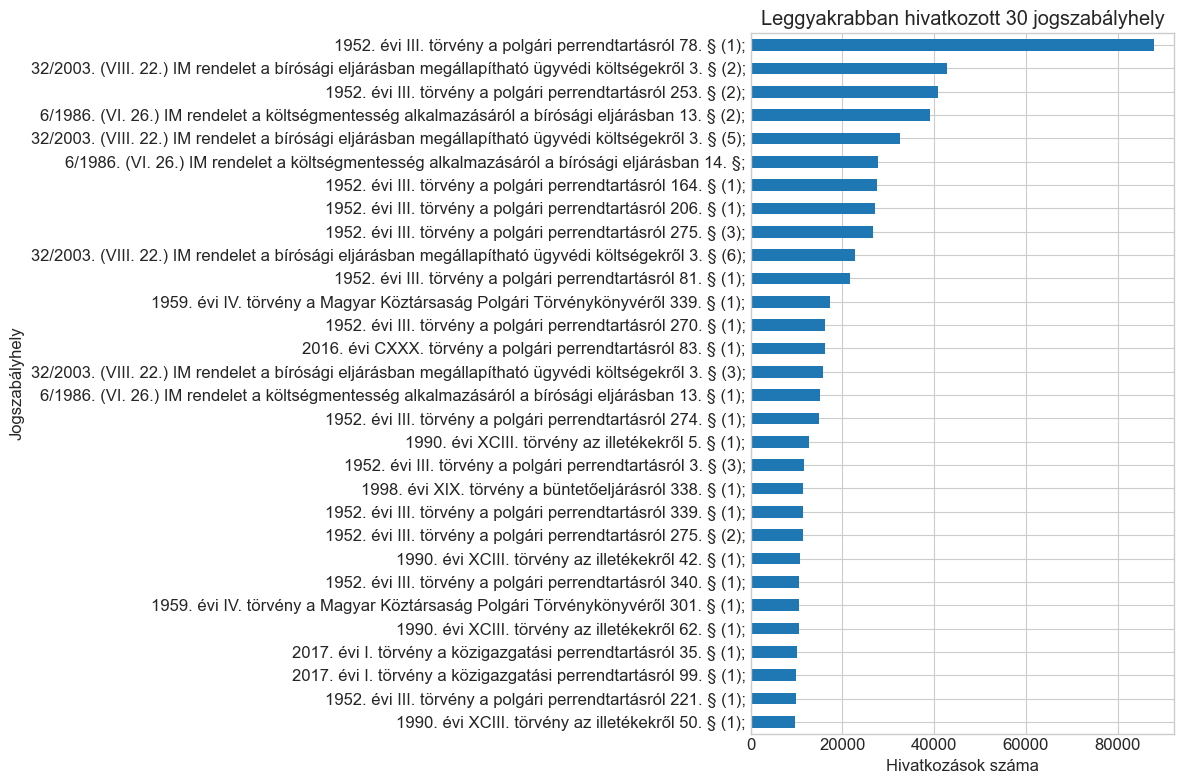

In [12]:
import ast
if 'df' in locals() and 'Jogszabalyhelyek' in df.columns:
    print("\n'Jogszabalyhelyek' elemzése:")

    # --- DIAGNOSZTICA START ---
    print("\nDiagnosztika: Első 10 nem-üres/nem-'[]' Jogszabalyhelyek érték:")
    sample_values = df[df['Jogszabalyhelyek'].notna() & (df['Jogszabalyhelyek'] != '[]')]['Jogszabalyhelyek'].head(10)
    if not sample_values.empty:
        for i, val in enumerate(sample_values):
            print(f"  {i+1}: Type={type(val)}, Value='{val}'")
    else:
        print("  Nem található minta a diagnosztikához (minden érték NaN vagy '[]').")
    print("--- DIAGNOSZTICA END ---\n")
    # --- END DIAGNOSTICS ---

    def parse_jogszabaly(value):
        if pd.isna(value) or not isinstance(value, str) or value.strip() == '[]' or not value.strip():
            return []
        try:
            # Darabolás a '</br>' mentén, majd felesleges szóközök eltávolítása
            items = value.split('</br>')
            # Üres elemek kiszűrése és szóközök eltávolítása az elemek elejéről/végéről
            cleaned_items = [item.strip() for item in items if item.strip()]
            return cleaned_items
        except Exception as e:
            # Váratlan hiba esetén is üres listát adunk vissza
            print(f"Hiba a jogszabályhely feldolgozása közben: {e}, Érték: {value}")
            return []

    df['parsed_jogszabalyhelyek'] = df['Jogszabalyhelyek'].apply(parse_jogszabaly)
    jogszabaly_series = df['parsed_jogszabalyhelyek'].explode().dropna()
    print(f"\nÖsszesen {len(jogszabaly_series)} jogszabályhely hivatkozás található (az összes dokumentumban).")
    if not jogszabaly_series.empty:
        jogszabaly_counts = jogszabaly_series.value_counts()
        print(f"\nEgyedi jogszabályhelyek száma: {len(jogszabaly_counts)}")
        top_n = 30
        print(f"\nLeggyakrabban hivatkozott {top_n} jogszabályhely:")
        display(jogszabaly_counts.head(top_n))
        plt.figure(figsize=(12, 8))
        jogszabaly_counts.head(top_n).plot(kind='barh')
        plt.title(f'Leggyakrabban hivatkozott {top_n} jogszabályhely')
        plt.xlabel('Hivatkozások száma')
        plt.ylabel('Jogszabályhely')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
    else:
        print("Nem található érvényes jogszabályhely hivatkozás az elemzéshez.")

## 8. Duplikált Szövegek Elemzése

In [13]:
if 'df' in locals() and 'text' in df.columns:
    print("\nDuplikált szövegek keresése:")
    # Üres stringeket és NaN-okat figyelmen kívül hagyjuk a duplikátumkeresésnél
    non_empty_texts = df[df['text'].fillna('').astype(str).str.len() > 0]['text']
    duplicates_count = non_empty_texts.duplicated().sum()
    print(f"{duplicates_count} duplikált (nem üres) szöveg található.")

    if duplicates_count > 0:
        duplicated_texts = df[df.duplicated(subset=['text'], keep=False) & (df['text'].fillna('').astype(str).str.len() > 0)]
        print("Példák duplikált szövegekre (max 5 csoport):")
        # Csoportosítjuk a duplikált szövegek alapján és kiírjuk az ID-kat
        grouped_duplicates = duplicated_texts.groupby('text')['doc_id'].apply(list)
        display(grouped_duplicates.head(5))


Duplikált szövegek keresése:
26 duplikált (nem üres) szöveg található.
Példák duplikált szövegekre (max 5 csoport):


text
504 Gateway Time-outThe server didn't respond in time.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

## 9. Összegzés és Következtetések

Az EDA során feltárt főbb megállapítások:
- **Adatmennyiség:** Összesen X dokumentum került betöltésre Y oszloppal.
- **Hiányzó adatok:** Jelentős hiányosságok figyelhetők meg a Z, W, ... oszlopokban. Ezek kezelése szükséges lehet a további elemzésekhez.
- **Szöveghossz:** A szövegek hossza változó, átlagosan K karakter. Néhány kiugróan hosszú/rövid dokumentum található.
- **Bíróságok:** A legtöbb dokumentum az A, B, C bíróságoktól származik.
- **Jogterületek:** A leggyakoribb jogterületek a D, E, F.
- **Évek:** A határozatok évei T1 és T2 között szóródnak leginkább.
- **Azonosítók:** Az [doc_id/Azonosito/EgyediAzonosito] egyedisége [megfelelő/nem megfelelő]. Duplikátumok [vannak/nincsenek].
- **Kapcsolódó ügyek:** A dokumentumok P százalékához tartozik kapcsolódó ügy.
- **Duplikátumok:** R darab duplikált szövegű dokumentumot találtunk.

**Javasolt következő lépések:**
- Hiányzó adatok kezelése (imputáció, sorok törlése).
- Rövid/üres szövegek eltávolítása vagy további vizsgálata.
- Duplikált szövegek kezelése (egyedi megtartása).
- Kategorikus változók további vizsgálata, esetleges összevonása.
- Szövegtisztítás és normalizálás (pl. írásjelek, kisbetűsítés, stoppszavak).
- Mélyebb szövegelemzés (pl. N-grammok, téma modellezés).

In [14]:
# Ez a cella üresen hagyható, vagy további kísérletezésre használható.
print("\nEDA futás befejezve.")


EDA futás befejezve.
